# **MOVIE SUCCESS IN RELATION TO ITS FILM DISTRIBUTION COMPANY**

Author: [Alexander Nguyen]

Course Project, UC Irvine, Math 10, S24

I would like to post my notebook on the course's website. [Yes]

# INTRODUCTION

The movie industry is an extremely competitive environment, where production companies constantly aim to release movies that do well in the box-office while also pleasing audiences. These companies will pour hundreds of millions of dollars into these movies in hopes of achieving success. In the dataset I have chosen, I have a list of 7668 movies from 1986 to 2016. By analyzing the data, I hope to find if there are any correlations between the commercial and popularity success of a movie alongside it's company. I also hope to look for any other correlations and create predictions based on these correlations.

# EXPLORING THE DATA

First, we load up the csv file through pandas and display the first 5 rows of the datatable

In [272]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [273]:
df = pd.read_csv('movies.csv.zip')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


We want to drop unnecessary columns, which include the release date, director, writer, star, country, rating, runtime, and genre of the movie, as we mainly want to focus on how well the movie performed based on it's budget, production company, etc.

In [274]:
df = df.drop(['released', 'director', 'writer', 'star', 'country', 'rating', 'runtime', 'genre'], axis=1)
df.head(5)


,name,year,score,votes,budget,gross,company
0,The Shining,1980,8.4,927000.0,19000000.0,46998772.0,Warner Bros.
1,The Blue Lagoon,1980,5.8,65000.0,4500000.0,58853106.0,Columbia Pictures
2,Star Wars: Episode V - The Empire Strikes Back,1980,8.7,1200000.0,18000000.0,538375067.0,Lucasfilm
3,Airplane!,1980,7.7,221000.0,3500000.0,83453539.0,Paramount Pictures
4,Caddyshack,1980,7.3,108000.0,6000000.0,39846344.0,Orion Pictures


In [275]:
print(f'Percentage of Missing Values in Budget Column: {(len(df[df['budget'].isnull()]) / 7668) * 100 :.2f}%')
print(f'Percentage of Missing Values in Gross Column: {(len(df[df['gross'].isnull()]) / 7668) * 100 :.2f}%')
print(f'Percentage of Missing Values in Score Column: {(len(df[df['score'].isnull()]) / 7668) * 100 :.2f}%')
print(f'Percentage of Missing Values in Votes Column: {(len(df[df['votes'].isnull()]) / 7668) * 100 :.2f}%')

Percentage of Missing Values in Budget Column: 28.31%
Percentage of Missing Values in Gross Column: 2.46%
Percentage of Missing Values in Score Column: 0.04%
Percentage of Missing Values in Votes Column: 0.04%


There are missing data values for most columns, but the columns that we will focus on that have missing values contain the score, votes, budget, and gross. Since the vote, score, and gross columns only have a small percentage of rows with missing values, we can easily drop them.

In [276]:
df_new = df
df_new.dropna(subset = ['score','votes','gross'], inplace=True)


Since 28.31% of the budget is missing, we need to use data imputation to replace the missing values. To figure out what measure of data we replace the missing data with, we have to display the budget data.

<Axes: xlabel='budget'>

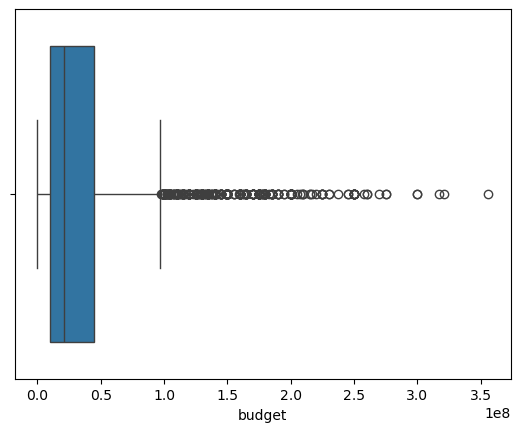

In [277]:
sns.boxplot(data=df_new, x="budget")

We can see that there is a large number of outliers in the distribution of the budget for movies, so the best measure of spread would be the median. We can then impute the median of the budget into the missing values to fill them in.

In [278]:
# from sklearn.impute import SimpleImputer
budget_median = df_new['budget'].median()
print(f'Median : ${budget_median}')
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
# df['budget'] = imputer.fit(df['budget'])
df_new['budget'] = df_new['budget'].fillna(budget_median)

Median : $21000000.0


We want to analyze the major movie companies of this dataset, as we want to analyze major movies and compare the most well-known companies. I have decided to reduce the list to the top 5 companies, so that I can better analyze any correlation between the companies and features.

In [279]:
df_new['company'].value_counts().head(5)

company
Universal Pictures       376
Warner Bros.             333
Columbia Pictures        332
Paramount Pictures       319
Twentieth Century Fox    240
Name: count, dtype: int64

In [280]:
company = df_new['company'].value_counts()
top_5 = company.nlargest(5).index.tolist()
subset_company = df_new[df_new['company'].isin(top_5)]

In [281]:
subset_company['net gain/loss'] = subset_company.apply(lambda row: row['gross'] - row['budget'], axis=1)
subset_company = subset_company.reset_index(drop=True)
subset_company

/var/folders/lf/1gn2p5yn6m96gw3zn57nrkq80000gn/T/ipykernel_2457/3519137803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_company['net gain/loss'] = subset_company.apply(lambda row: row['gross'] - row['budget'], axis=1)


,name,year,score,votes,budget,gross,company,net gain/loss
0,The Shining,1980,8.4,927000.0,19000000.0,46998772.0,Warner Bros.,27998772.0
1,The Blue Lagoon,1980,5.8,65000.0,4500000.0,58853106.0,Columbia Pictures,54353106.0
2,Airplane!,1980,7.7,221000.0,3500000.0,83453539.0,Paramount Pictures,79953539.0
3,Friday the 13th,1980,6.4,123000.0,550000.0,39754601.0,Paramount Pictures,39204601.0
4,The Blues Brothers,1980,7.9,188000.0,27000000.0,115229890.0,Universal Pictures,88229890.0
...,...,...,...,...,...,...,...,...
1595,Tenet,2020,7.4,387000.0,205000000.0,363656624.0,Warner Bros.,158656624.0
1596,The Invisible Man,2020,7.1,186000.0,7000000.0,143151000.0,Universal Pictures,136151000.0
1597,Bad Boys for Life,2020,6.6,140000.0,90000000.0,426505244.0,Columbia Pictures,336505244.0
1598,Sonic the Hedgehog,2020,6.5,102000.0,85000000.0,319715683.0,Paramount Pictures,234715683.0


# ANALYZING DATA

We can begin by analyzing the data through displaying basic information about the data, searching for any patterns they may display.

In [282]:
subset_company.dtypes

name              object
year               int64
score            float64
votes            float64
budget           float64
gross            float64
company           object
net gain/loss    float64
dtype: object

In [283]:
subset_company.shape

(1600, 8)

Let's first take a look at the score category. We can analyze the distribution of score and how it relates to the most popular film production companies.

In [284]:
subset_company['score'].describe()

count    1600.000000
mean        6.355375
std         0.916984
min         2.200000
25%         5.800000
50%         6.400000
75%         7.000000
max         9.000000
Name: score, dtype: float64

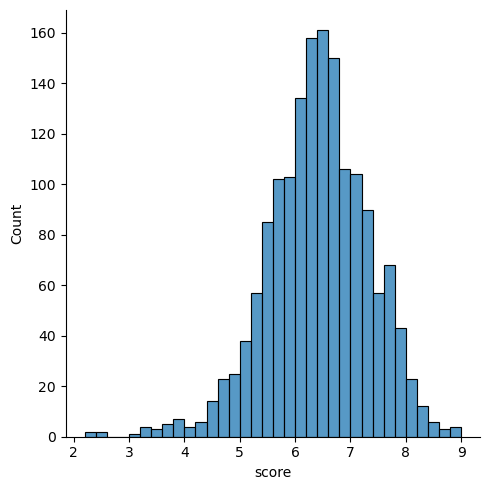

In [285]:
sns.displot(subset_company, x="score")

We see that there is a relatively normal distribution that's slightly skewed left between the scores of movies, averaging from a score of 6-7. 

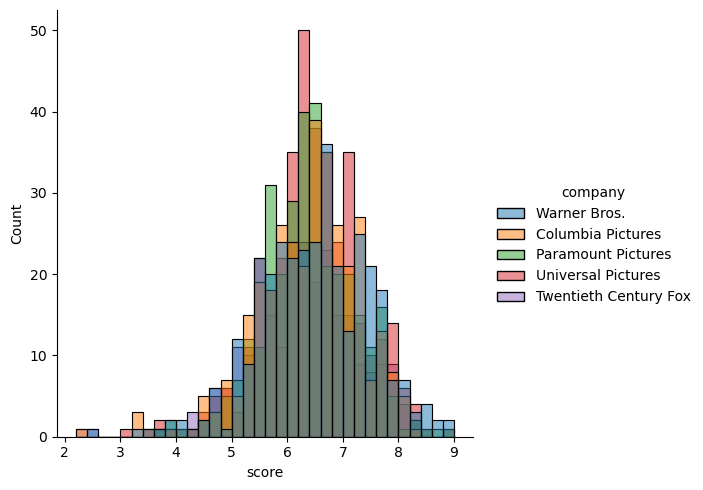

In [286]:
sns.displot(subset_company, x="score", hue=subset_company['company'])

We can now see the score distribution between the top 5 companies. Notably, Warner Bros. tends to have higher scores, Universal Pictures tends to be have average to higher scores, and Columbia Pictures tends to have average to lower scores.

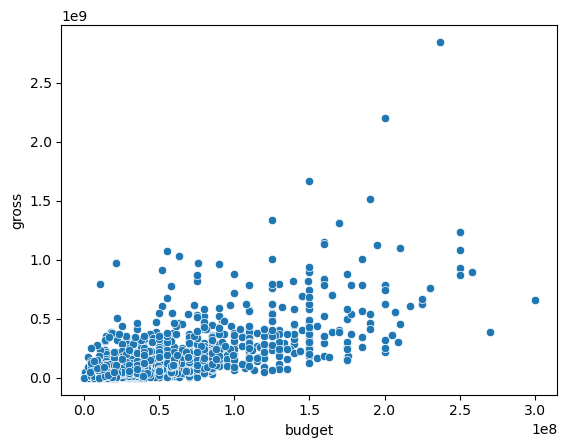

In [287]:
ax = sns.scatterplot(data=subset_company, x='budget',y='gross')

Comparing the budget with the gross of movies from the top 5 production companies, we see that there are major outliers in gross that affect the visualization of the scatterplot. We can set a limit for the gross to get rid of some outliers, and get a better representation of the data

[(0.0, 1000000000.0)]

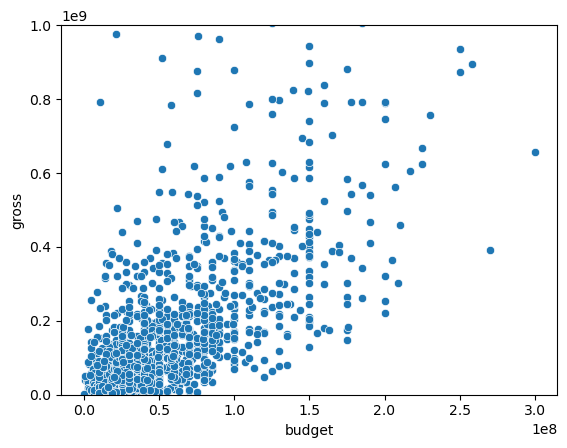

In [288]:
ax = sns.scatterplot(data=subset_company, x='budget',y='gross')
ax.set(ylim=(0,1000000000))

We can now see a better visualization of the budget vs gross, in which we see a slight positive correlation. We will further explore this correlation later on.

[Text(0.5, 0, 'gross (in billions)')]

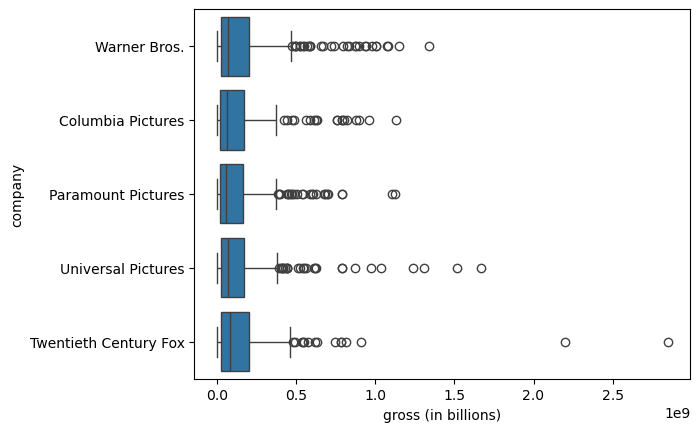

In [289]:
ax = sns.boxplot(subset_company, x='gross', y=subset_company['company'])
ax.set(xlabel='gross (in billions)')

[Text(0.5, 0, 'budget (by 100 million)')]

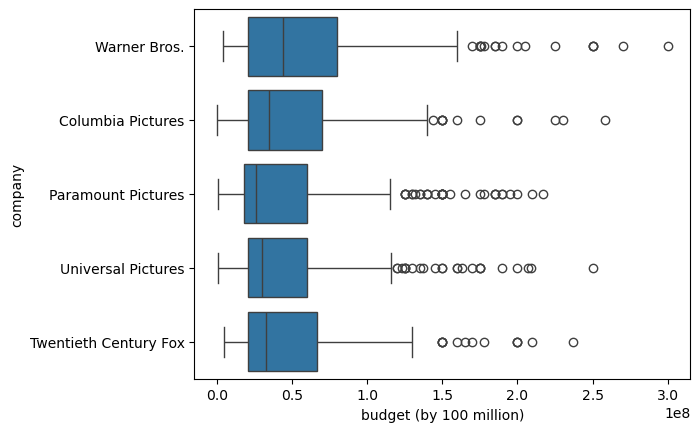

In [290]:
ax = sns.boxplot(subset_company, x='budget', y=subset_company['company'])
ax.set(xlabel='budget (by 100 million)')


Looking at the boxplots for the top 5 companies alongside their budget and grossing, we can once again see that there are extreme outliers for both. This makes sense, as each movie production company has very few successful movies that reach such high grossing, and certain movies receive major budgets depending on the promise of the movie or projected grossing. However, we see that Warner Bros. has spent the most on movies in terms of budget, yet Twentieth Century Fox seems to have had the most commercially successful movies, revealing that even if the movie company spends a lot on budget, they may not receive the most success in the box-office.

<Axes: >

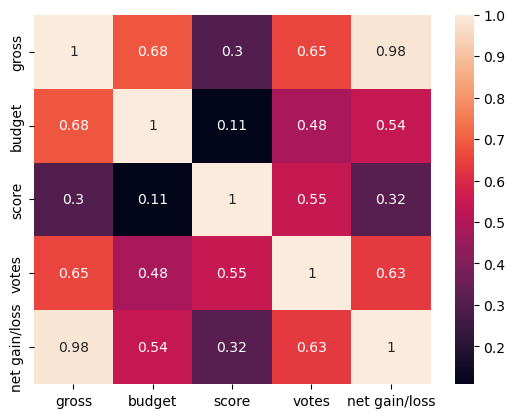

In [291]:
corr = subset_company[["gross", "budget", "score", "votes", 'net gain/loss']].corr()
sns.heatmap(corr, annot=True)


Using a heatmap, we now see the correlation between the different features we have in our dataset. Budget and gross have the strongest correlation, which helps prove our prediction that the more money you put into a movie, the better commercial success you receive. We also have a strong correlation between gross and votes, which also makes sense. As more people view a movie, the revenue of a movie increases.

# MACHINE LEARNING

After looking through the data and searching for patterns, we can attempt to make predictions based on the data. We can start with making predictions on the specific movie company based on the features "gross", "budget", "score", and "votes", to see if there are any differing featuristics between the top 5 movie companies we have chosen.

In [292]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [293]:
features = ['budget','gross','score','votes']
subset_company['company'] = subset_company['company'].replace({'Universal Pictures': 0, 'Warner Bros.': 1, 'Columbia Pictures': 2, 'Paramount Pictures' : 3, 'Twentieth Century Fox' : 4})

for feature in features:
    lm = LinearRegression()
    lm.fit(subset_company[[feature]], subset_company['company'])
    score = lm.score(subset_company[[feature]], subset_company['company'])
    print(f'{feature} R^2 Value: {score}')

budget R^2 Value: 0.00011393137092130523
gross R^2 Value: 5.438703912674647e-06
score R^2 Value: 0.003058345288662001
votes R^2 Value: 0.0003162757310316566


/var/folders/lf/1gn2p5yn6m96gw3zn57nrkq80000gn/T/ipykernel_2457/2064163978.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  subset_company['company'] = subset_company['company'].replace({'Universal Pictures': 0, 'Warner Bros.': 1, 'Columbia Pictures': 2, 'Paramount Pictures' : 3, 'Twentieth Century Fox' : 4})


I started with single variable linear regression, and fit each feature into a linear regression model to see which was the best predictor of the company, using the $R^2$ value to determine how well the model was. Unfortunately, none of the features can predict the company as shown by the scores. This shows us that none of the top 5 companies stand out in terms of commercial or populairty success, which we were starting to see through the analyzation of the data earlier. Although there are no correlations between any of the features and the company, we did learn that there was a strong correlation between budget and gross, which can try further exploring through a linear regression.

In [294]:
lm = LinearRegression()
lm.fit(subset_company[['budget']], subset_company['gross'])
score = lm.score(subset_company[['budget']], subset_company['gross'])
print(f'R2 = {score}')


R2 = 0.46757209877600703


After fitting the model, we get an $R^2$ value of .46, which is pretty weak, revealing that there isn't a strong linear relationship between the budget and gross of a movie.

We can also take a look at the relationship between votes and net gain/loss, which we saw a slightly strong correlation in earlier. Logically, a movie's votes and score will have an affect on the net gain/loss, as the more popular a movie is, the more people there will be to watch it, increasing box office. We can first try fitting it onto a linear regression, but this time validating the $R^2$ value using 5-fold validation.

In [295]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler

features = ['votes']

X = subset_company[features]
y = subset_company['net gain/loss']
# Setup 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform cross-validation
r2_scores = cross_val_score(lm, X, y, cv=kf, scoring='r2')

# Calculate average and standard deviation of R-squared scores
average_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

print(f'Average R-squared: {average_r2:.5f}')
print(f'Standard Deviation of R-squared: {std_r2:.5f}')


Average R-squared: 0.38664
Standard Deviation of R-squared: 0.09345


Again, we find a weak average $R^2$ value between votes and net gain/loss. However, we can instead try and fit the data onto a logistic regression model using classification. First, I wanted to see all the titles that had a negative revenue. 

In [296]:
titles = []
for i in range(len(subset_company['net gain/loss'])):
    if subset_company.loc[i,'net gain/loss'] < 0:
        titles.append(subset_company.loc[i,'name'])

print(len(titles))

432


We want to have two classes, whether a movie has a net gain or net loss in the box-office. I created a for-loop to create class 0, for when a movie has a net loss, and a class 1, if a movie has a positive net gain.

In [297]:
for i in range(len(subset_company['net gain/loss'])):
    if subset_company.loc[i,'net gain/loss'] < 0:
        subset_company.loc[i,'net gain/loss'] = 0
    elif subset_company.loc[i,'net gain/loss'] > 0:
        subset_company.loc[i,'net gain/loss'] = 1

subset_company

,name,year,score,votes,budget,gross,company,net gain/loss
0,The Shining,1980,8.4,927000.0,19000000.0,46998772.0,1,1.0
1,The Blue Lagoon,1980,5.8,65000.0,4500000.0,58853106.0,2,1.0
2,Airplane!,1980,7.7,221000.0,3500000.0,83453539.0,3,1.0
3,Friday the 13th,1980,6.4,123000.0,550000.0,39754601.0,3,1.0
4,The Blues Brothers,1980,7.9,188000.0,27000000.0,115229890.0,0,1.0
...,...,...,...,...,...,...,...,...
1595,Tenet,2020,7.4,387000.0,205000000.0,363656624.0,1,1.0
1596,The Invisible Man,2020,7.1,186000.0,7000000.0,143151000.0,0,1.0
1597,Bad Boys for Life,2020,6.6,140000.0,90000000.0,426505244.0,2,1.0
1598,Sonic the Hedgehog,2020,6.5,102000.0,85000000.0,319715683.0,3,1.0


I then scaled the features using a standard scaler, with a mean of 0 and standard deviation of 1. I then fit the data onto a logistic regression model. 

In [298]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['votes']
subset_company[features] = scaler.fit_transform(subset_company[features])

In [299]:
from sklearn.linear_model import LogisticRegression

X = subset_company[features]
y = subset_company['net gain/loss']
clf = LogisticRegression(multi_class='multinomial', penalty=None)
clf.fit(X, y)
print(f'R^2 value: {clf.score(X, y)}')

R^2 value: 0.811875


After fitting the model, we get a stronger $R^2$ value of 0.812, which reveals that with our model, we have a strong probability of predicting whether a movie will have a positive or negative revenue in the box-office based on how popular the movie is among viewers.

# EXTRA

For this portion, we will be using a different machine learning tool to create a model fitting votes to predict the net gain/loss. I downloaded the package TensorFlow, as it allows for efficient deep learning that's quick and reproducible.

In [300]:
from sklearn.model_selection import train_test_split

First, we're going to split our data into training and testing data, in order to have a data set dedicated towards training our model, and a set of data to test it on for accuracy.

In [301]:
X = X = subset_company[features]
y = subset_company['net gain/loss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)



In [302]:
import tensorflow as tf
import keras as keras
from sklearn.metrics import accuracy_score

From Tensorflow, we want to create a model using tf.keras.Sequential(), which will be our main model class that we fit our data onto. The Dense feature is a layer that allows us to build hidden layers within our model, which in this case is 2 hidden layers. The first hidden layer takes our raw data and passes it through a relu activation function, which takes our data and converts the output to a minimum of zero and an unlimited upward value. Our second hidden layer determines a true or false output, which in this case is whether a movie has a positive or negative net gain. We use the Sigmoid function to convert the value to 0 or 1, with 0 being that the movie had a negative gain and 1 being that the movie had a positive gain.

In [303]:
model = tf.keras.Sequential()
Dense = tf.keras.layers.Dense
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))


/Users/alexnguyen/anaconda3/envs/math9/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We want to determine how well our fit is, so we want to know the binary cross entropy loss as well as the $R^2$ value.

In [304]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [305]:
model.fit(X_train, y_train, epochs=500, batch_size=32)

Epoch 1/500


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.6043 - loss: 0.6867
Epoch 2/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.7258 - loss: 0.6465
Epoch 3/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.7390 - loss: 0.6126
Epoch 4/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.7478 - loss: 0.5833
Epoch 5/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.7269 - loss: 0.5764
Epoch 6/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7455 - loss: 0.5560
Epoch 7/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.7368 - loss: 0.5490
Epoch 8/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7449 - loss: 0.5331
Epoch 9/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.7216 - loss: 0.5420
Epoch 10/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.7161 - loss: 0.5373
Epoch 11/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.7310 - loss: 0.5223
Epoch 12/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step

In [306]:
y_hat = model.predict(X_test)
y_hat = [0 if x <0.5 else 1 for x in y_hat]


accuracy_score(y_test,y_hat)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step


0.815625

After training our model for different periods of time, I've found that the $R^2$ value of the model is around the same compared to our logistic regression model. However, this model is much nicer to use as it allows us to determine how long we want to train our model for, while also allowing us to save the model and reproduce it for later use.

# SUMMARY

After exploring the dataset of movie info and using analysis methods such as linear regression and classification, I was able to come up with results both expected and unexpected. 

My initial attempt to find a correlation between votes, score, gross, and budget in relation to a company was unsuccessful. Using a linear regression to fit the features produced extremely low accuracy . With this, I found out that between the 5 most frequent companies in my dataset, the relation between the individual features and individual companies were not significant, such that no company performed noticably better or worse within one of the features. We can conclude that the companies in question are all similar competitors against each other, with no company being extremely differentiable from the rest.

I then explored another correlation between the budget and gross of a movie, fitting the budget onto a linear regression model to predict the gross. Once again, it produced a weak accuracy score, revealing that the amount of budget does not always determine how much a movie will make.

However, when exploring the relation between votes and the net gain/loss of revenue for a movie, I found a good correlation. Although a linear regression model including validation with KNN produced a low average $R^2$ value, fitting the data onto a logistic regression gave a strong accuracy score, using binary classification. My two classes consisted of either a positive or negative net revenue for the movie, and we were able to get around 0.8 for the $R^2$ value, which is strong. We were also able to get a similar score using Tensorflow. This correlation makes sense, as the more people watch a movie, the more revenue a movie will gross.

# REFERENCES

Source of Dataset: https://www.kaggle.com/datasets/danielgrijalvas/movies?resource=download

Tutorial for Tensorflow: https://www.youtube.com/watch?v=6_2hzRopPbQ&ab_channel=NicholasRenotte

